# Music and User Datasets analysis

Dataset source<br>
https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm/data<br><br>
Unpack to root folder of the project and for the two csv files rename spaces to underscores

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
user_df = pd.read_csv('User_Listening_History.csv')
music_df = pd.read_csv('Music_Info.csv')

## Explore user data

In [6]:
user_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [5]:
print(len(user_df))
print(len(user_df['user_id'].unique()))

9711301
962037


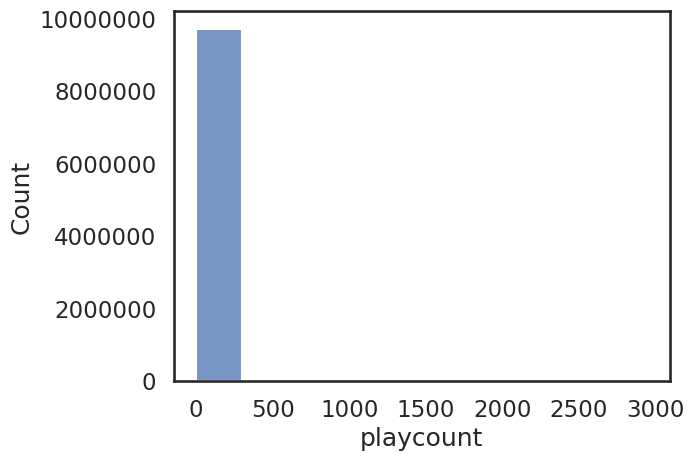

In [6]:
sns.set_theme(style="white", context="talk")
sns.histplot(user_df['playcount'], bins=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [7]:
# get track id with most plays
# row with highest playcount
highrow = user_df.loc[user_df['playcount'].idxmax()]
print(highrow)

# row in music_df with this track id
music_df.loc[music_df['track_id'] == highrow['track_id']]

track_id                           TRUBSZM128F422ABDE
user_id      1854daf178674bbac9a8ed3d481f95b76676b414
playcount                                        2948
Name: 9690999, dtype: object


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
28944,TRUBSZM128F422ABDE,Sweet Escape,Alesso,https://p.scdn.co/mp3-preview/c4497002f6989796...,0Wz6vFHimAwaU2A1iMDc9c,"pop, dance, trance",NaN,2016,231160,0.572,...,2,-3.811,1,0.0427,0.0772,0.000001,0.128,0.483,126.013,4


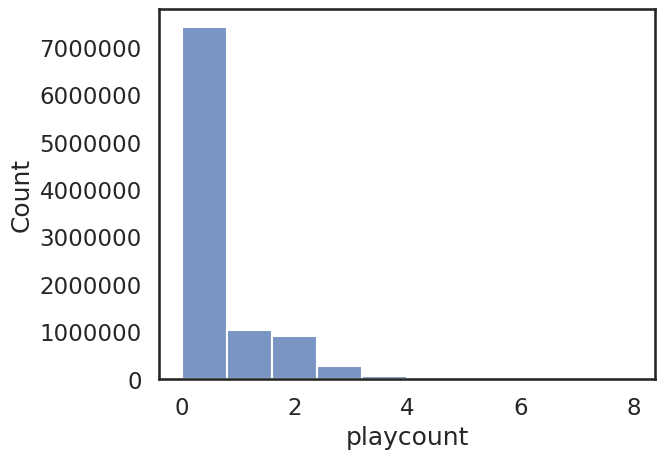

In [8]:
log_playcount = np.log(user_df['playcount'])
sns.histplot(log_playcount, bins=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [21]:
len(user_df)

9711301

In [36]:
x = 10
user_df_less_than_x = user_df[user_df['playcount'] <= x]

In [37]:
len(user_df_less_than_x)

9370727

In [38]:
# check if all track_id's in user_df are in music_df

# get unique track_id's from user_df
tracks_in_user = user_df_less_than_x['track_id'].unique()

tracks_in_music = music_df['track_id'].values

all_present = np.all(np.in1d(tracks_in_user, tracks_in_music))
print(all_present)

True


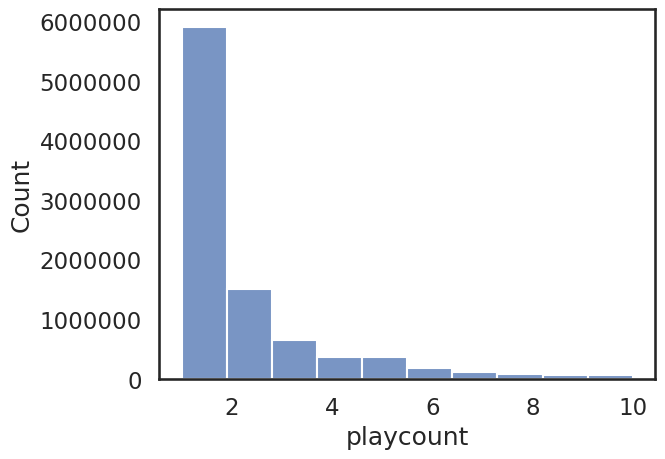

In [39]:
# seaborn histogram of play counts
sns.histplot(user_df_less_than_x['playcount'], bins=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Explore music dataframe

In [40]:
len(music_df)

50683

In [41]:
music_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [42]:
music_df.dtypes

track_id                object
name                    object
artist                  object
spotify_preview_url     object
spotify_id              object
tags                    object
genre                   object
year                     int64
duration_ms              int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
dtype: object

In [43]:
# numerical features
num_features = ['year', 'duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

In [44]:
# to_numerical
for feature in num_features:
    music_df[feature] = pd.to_numeric(music_df[feature])

<Axes: xlabel='tempo', ylabel='Count'>

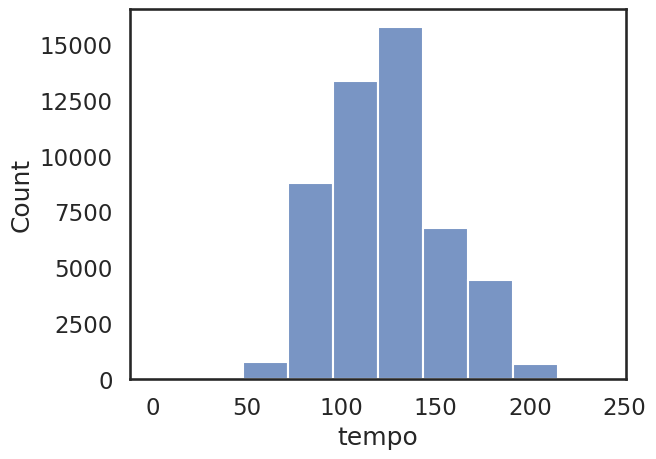

In [45]:
# danceability distribution
sns.histplot(music_df['tempo'], bins=10)

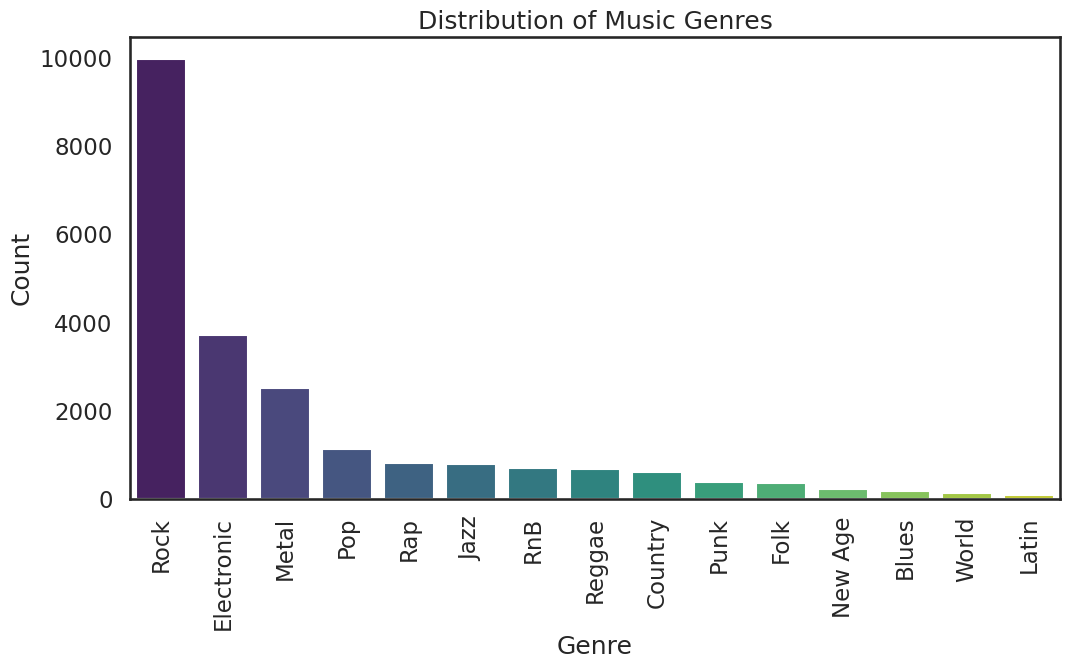

In [46]:
# Sort the DataFrame by the count of each genre
sorted_genres = music_df['genre'].value_counts().index

# Creating a sorted bar plot with vertical x-ticks
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=music_df, order=sorted_genres, palette='viridis')
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-ticks to be vertical

# Display the plot
plt.show()

In [60]:
import plotly.express as px

music_notna = music_df[music_df['genre'].notna()]
# Step 1: Prepare the data
# Group by year and genre, and count the number of tracks
grouped_df = music_notna.groupby(['year', 'genre']).size().reset_index(name='count')

# Pivot the DataFrame to have years as rows and genres as columns
pivoted_df = grouped_df.pivot(index='year', columns='genre', values='count').fillna(0)

# Step 2: Create the streamgraph
fig = px.area(pivoted_df, 
              labels={"value": "Number of Songs", "variable": "Genre"},
              title="Number of Songs by Genre Each Year")

# Display the plot
fig.show()

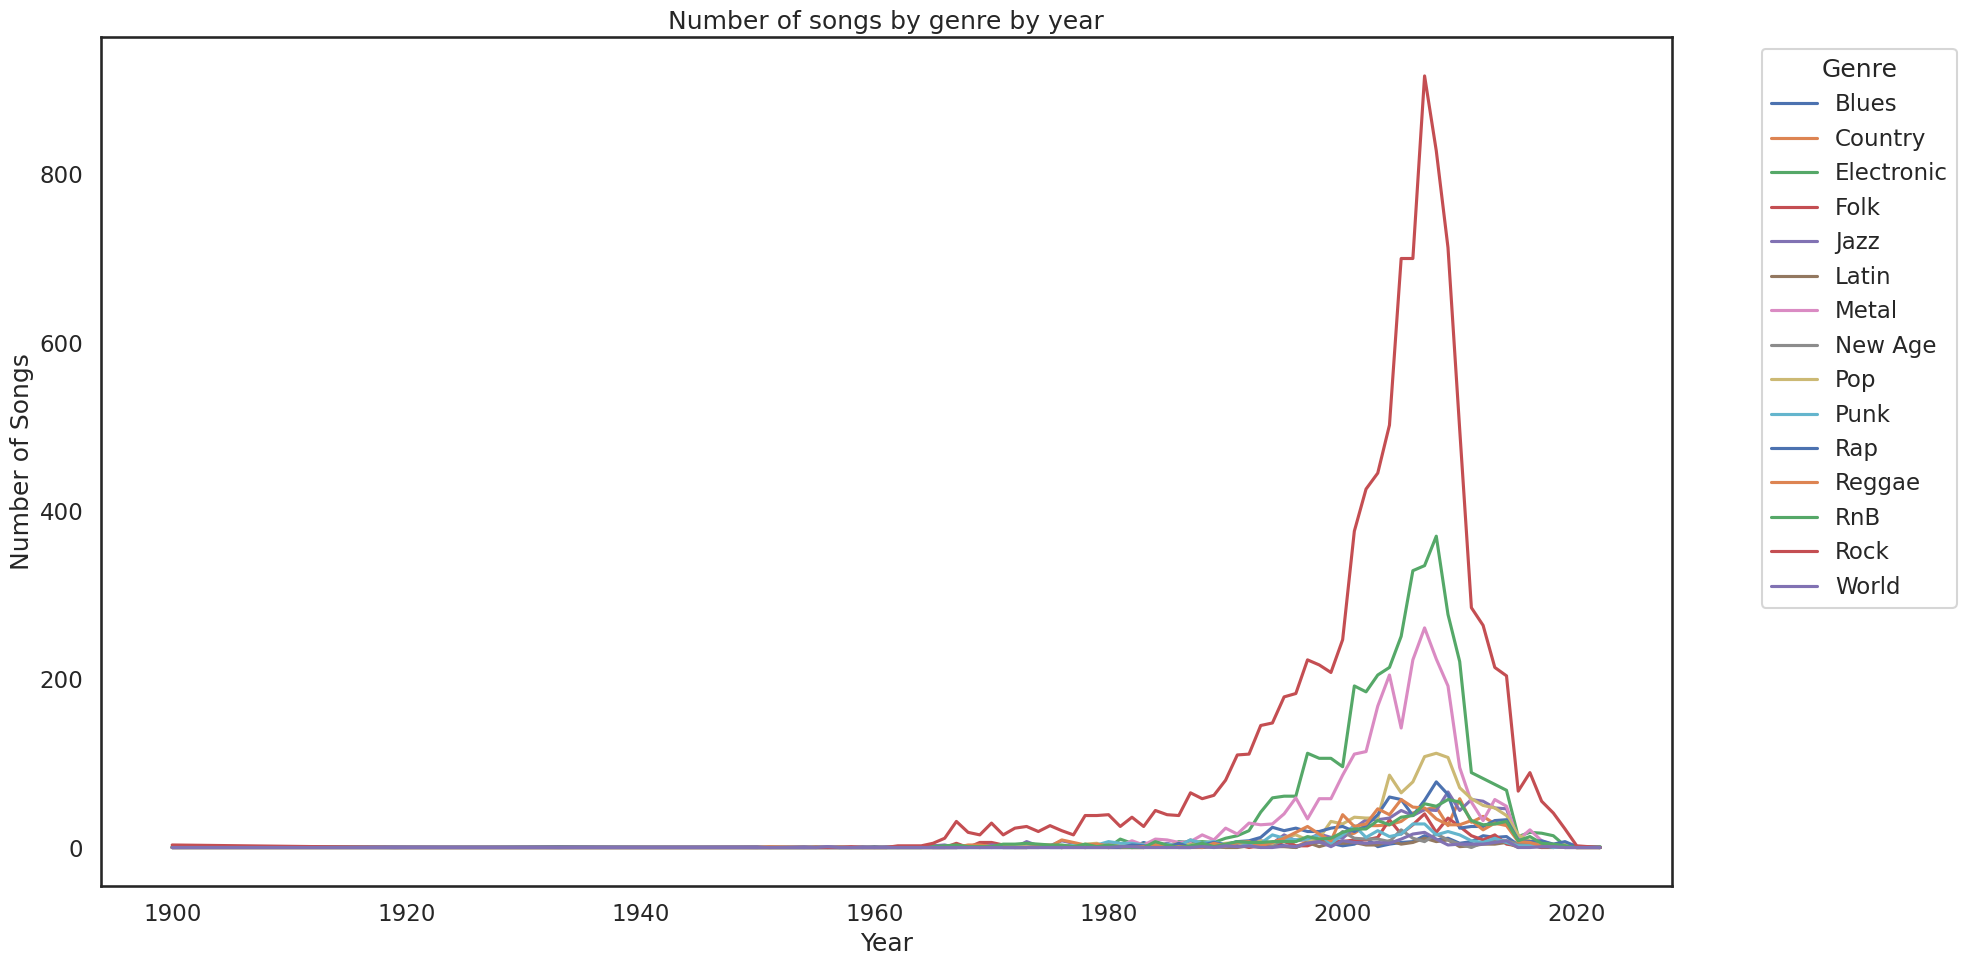

In [61]:
pivoted_df.plot(kind='line', figsize=(20, 10), title='Number of songs by genre by year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

In [62]:
pivoted_df.head()

genre,Blues,Country,Electronic,Folk,Jazz,Latin,Metal,New Age,Pop,Punk,Rap,Reggae,RnB,Rock,World
year,,,,,,,,,,,,,,,
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
1919,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1933,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


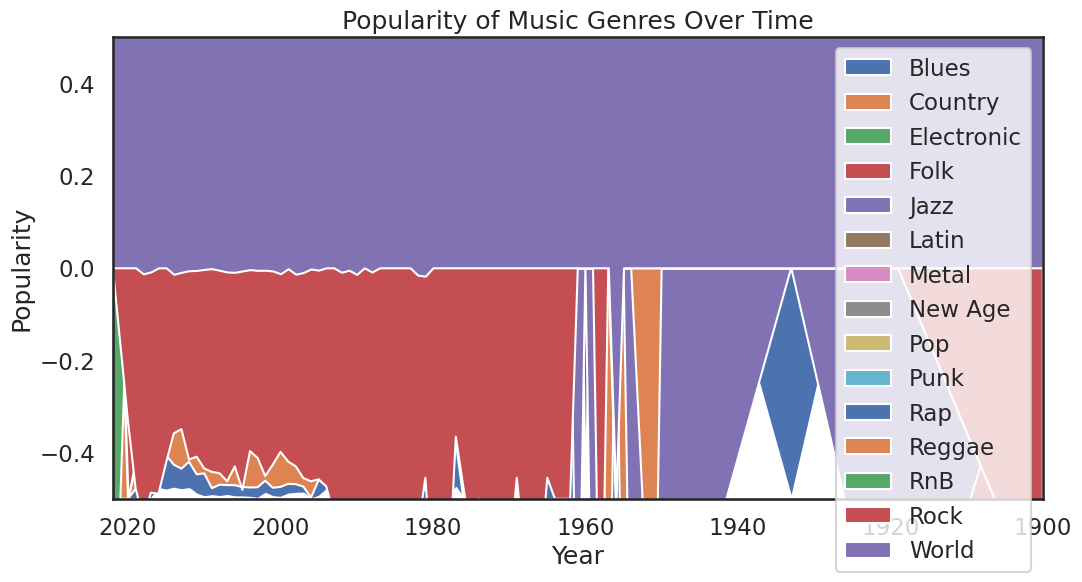

In [63]:
# streamgraph / theme river of genres over the years (NOT WORKING!)

# normalize data
music_df_norm = pivoted_df.div(pivoted_df.sum(axis=1), axis=0)

music_df_mid = music_df_norm.cumsum(axis=1) - (music_df_norm.sum(axis=1) / 2).values.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(12, 6))

# reverse dataframe order
music_df_norm = music_df_norm.iloc[::-1]
music_df_mid = music_df_mid.iloc[::-1]

for i, genre in enumerate(music_df_norm.columns):
    if i == 0:
        bottom_series = -music_df_mid.iloc[:, i]
    else:
        bottom_series = music_df_mid.iloc[:, i - 1] - music_df_mid.iloc[:, i]
    
    top_series = music_df_mid.iloc[:, i]

    ax.fill_between(music_df_norm.index, bottom_series, top_series, label=genre)

ax.set_xlim(music_df_norm.index[0], music_df_norm.index[-1])
ax.set_ylim(-0.5, 0.5)  # Adjust if necessary
ax.legend(loc='upper right')
ax.set_title('Popularity of Music Genres Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')

plt.show()

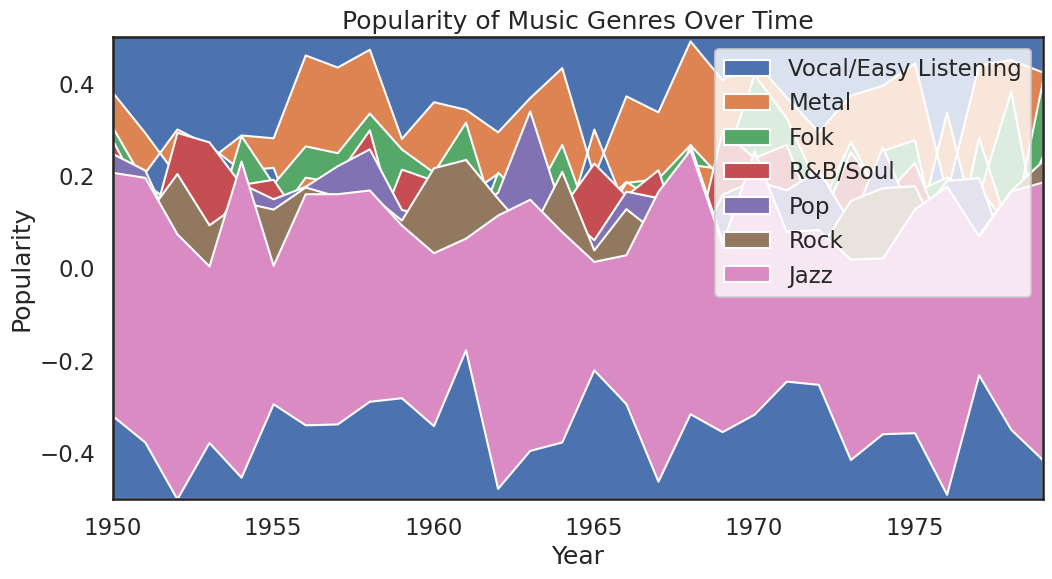

In [49]:
# original chatgpt version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
years = range(1950, 1980)
genres = ['Jazz', 'Rock', 'Pop', 'R&B/Soul', 'Folk', 'Metal', 'Vocal/Easy Listening']

# This would be your actual data
data = np.random.rand(len(years), len(genres))
df = pd.DataFrame(data, index=years, columns=genres)

# Normalize the data
df_norm = df.div(df.sum(axis=1), axis=0)

# Find the mid-point of the data
df_mid = df_norm.cumsum(axis=1) - (df_norm.sum(axis=1) / 2).values.reshape(-1, 1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# We need to reverse the DataFrame order to plot with fill_between
df_norm = df_norm.iloc[:, ::-1]
df_mid = df_mid.iloc[:, ::-1]

for i, genre in enumerate(df_norm.columns):
    # The fill_between function requires a top and bottom series
    if i == 0:
        bottom_series = -df_mid.iloc[:, i]
    else:
        bottom_series = df_mid.iloc[:, i-1] - df_mid.iloc[:, i]
    
    top_series = df_mid.iloc[:, i]
    
    ax.fill_between(df_norm.index, bottom_series, top_series, label=genre)

# Additional customizations
ax.set_xlim(df_norm.index[0], df_norm.index[-1])
ax.set_ylim(-0.5, 0.5)  # Adjust if necessary
ax.legend(loc='upper right')
ax.set_title('Popularity of Music Genres Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')

plt.show()

In [52]:
df_norm.head()

,Vocal/Easy Listening,Metal,Folk,R&B/Soul,Pop,Rock,Jazz
1950,0.120420,0.076042,0.027739,0.247601,0.141153,0.207162,0.179884
1951,0.206916,0.109727,0.041565,0.212149,0.109889,0.196311,0.123443
1952,0.301148,0.065381,0.293576,0.060729,0.204540,0.074236,0.000390
1953,0.265559,0.180027,0.273179,0.060533,0.093633,0.004633,0.122436
1954,0.211868,0.001572,0.180906,0.183323,0.143359,0.231650,0.047323


In [3]:
df.head()

,Jazz,Rock,Pop,R&B/Soul,Folk,Metal,Vocal/Easy Listening
1950,0.365828,0.382846,0.371962,0.229046,0.902810,0.191528,0.203444
1951,0.893118,0.768611,0.844560,0.118659,0.435478,0.441729,0.863715
1952,0.467303,0.919943,0.448176,0.096833,0.748975,0.209749,0.115241
1953,0.049726,0.707513,0.255255,0.461181,0.321664,0.950312,0.330290
1954,0.528257,0.445630,0.252896,0.160613,0.966631,0.342291,0.055304


In [26]:
# check if Cardi B is in music_df, just because she is modern
music_df[music_df['artist'] == 'Cardi B']

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
14993,TRCSJHC128F9336428,Be Careful,Cardi B,https://p.scdn.co/mp3-preview/befe3cd3011f62ef...,2Yl4OmDby9iitgNWZPwxkd,"rap, blues, hip_hop, american, rnb",NaN,2018,210787,0.820,...,6,-8.230,0,0.411,0.0256,0.000000,0.0952,0.535,152.279,4
15008,TRUEERB128F4288B1F,Please Me,Cardi B,https://p.scdn.co/mp3-preview/a25d43f3262e0762...,0PG9fbaaHFHfre2gUVo7AN,"soul, rap, hip_hop, rnb",NaN,2019,200889,0.747,...,1,-6.711,1,0.081,0.0642,0.000000,0.0832,0.650,133.992,4
29510,TRHZPRU12903CA1EFA,Money Bag,Cardi B,https://p.scdn.co/mp3-preview/3157a8e45586829b...,1vBeIXlzbAieGoDqInav5j,"rap, hip_hop, house",NaN,2018,229004,0.947,...,10,-6.138,0,0.124,0.1070,0.000691,0.1080,0.454,129.977,4


In [27]:
# check for max year and min year in music_df
max_year = music_df['year'].max()
min_year = music_df['year'].min()
print(max_year)
print(min_year)


2022
1900


In [28]:
music_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [29]:
# music_df missing values
music_df.isnull().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [30]:
# head of music_df rows where genre is not missing
music_df[music_df['genre'].notnull()].head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
8,TRMZXEW128F9341FD5,The Scientist,Coldplay,https://p.scdn.co/mp3-preview/95cb9df1b056d759...,0GSSsT9szp0rJkBrYkzy6s,"rock, alternative, indie, pop, alternative_roc...",Rock,2007,311014,0.566,...,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4
10,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,2003,265506,0.554,...,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4
12,TRYEZGE128F92D04C8,Feel Good Inc.,Gorillaz,https://p.scdn.co/mp3-preview/7388c425022ced92...,09xrHi86kLkEIzDLZiHNnv,"rock, electronic, alternative, indie, pop, alt...",RnB,2010,223106,0.809,...,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4


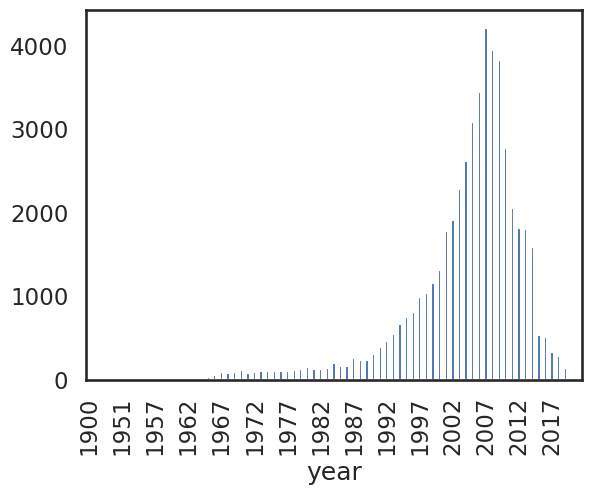

In [33]:
# plot distribution of year with tick labels occuring every 5 years
music_df_by_year = music_df.groupby('year').count()
music_df_by_year['track_id'].plot(kind='bar')
plt.xticks(np.arange(0, len(music_df_by_year), 5))
plt.show()


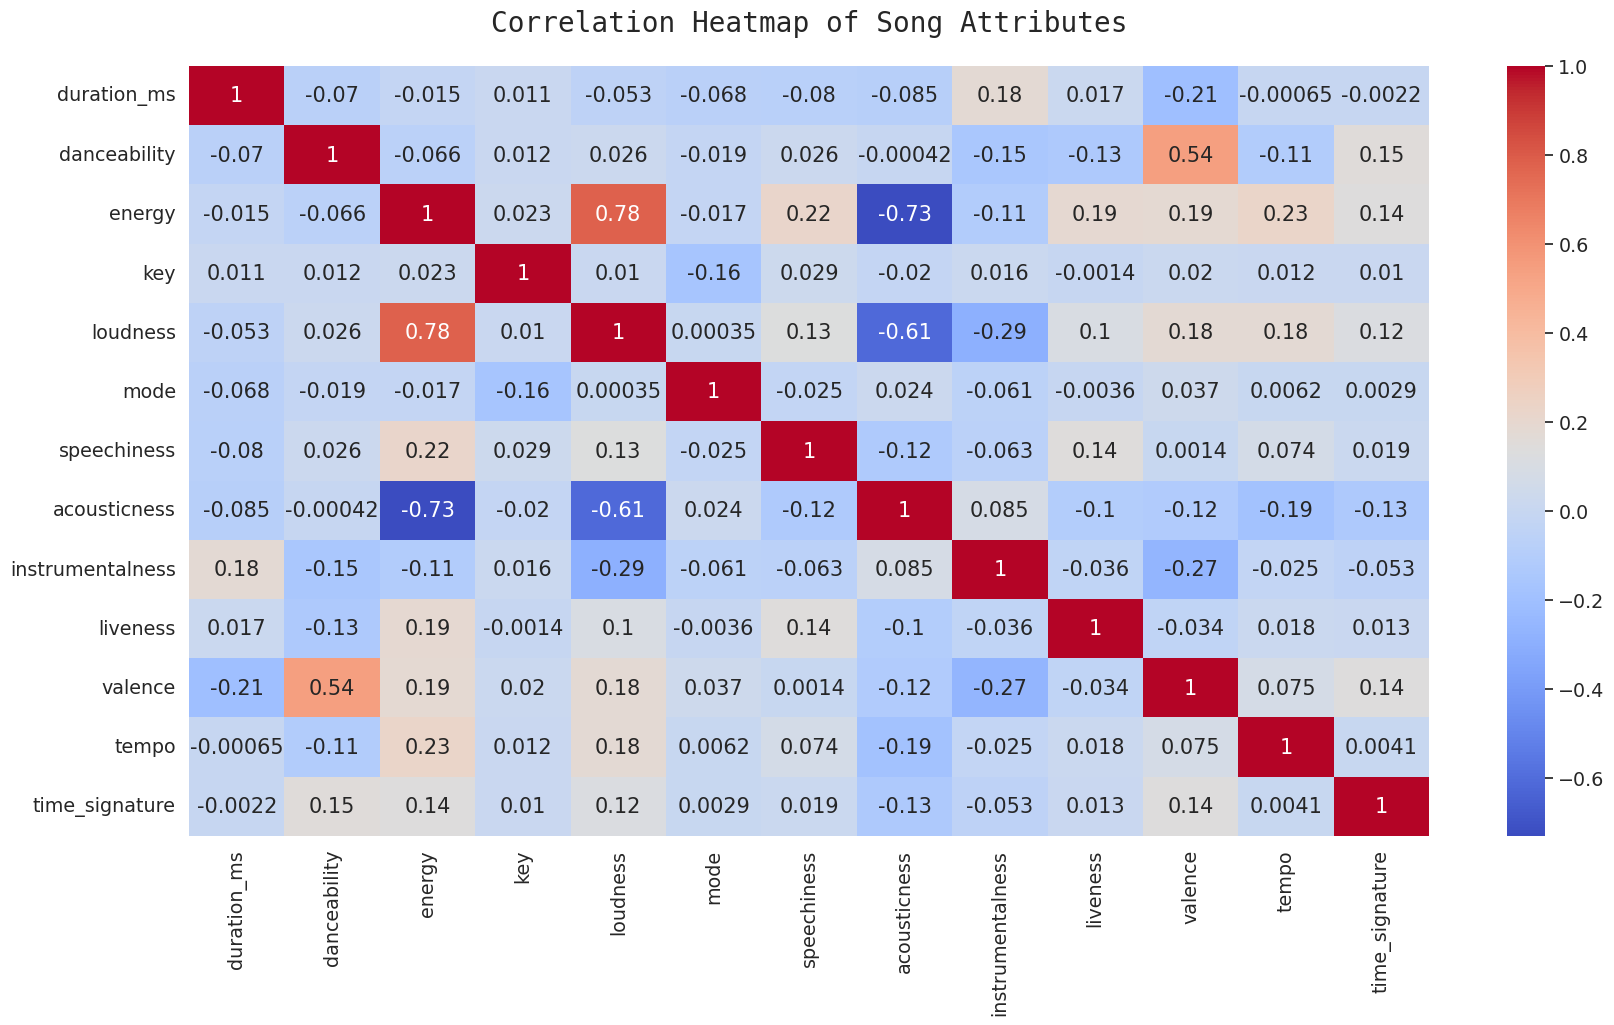

In [34]:
# correlation between song attributes
heatmap_df = music_df[['duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']]

font = {'fontname' : 'Monospace', 'fontsize' : '20', 'pad' : '25'}
sns.set(font_scale=1.25)

plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap of Song Attributes', **font)

sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm')
plt.show()